In [1]:
import os
import cv2
import numpy as np
from numpy.fft import fft2, ifft2
from scipy.signal import gaussian, convolve2d
import matplotlib.pyplot as plt
import torch 
import random
from skimage.util import random_noise
import tensorflow as tf

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
def wiener_filter(img, kernel, K):
	kernel /= np.sum(kernel)
	dummy = np.copy(img)
	dummy = fft2(dummy)
	kernel = fft2(kernel, s = img.shape)
	kernel = np.conj(kernel) / (np.abs(kernel) ** 2 + K)
	dummy = dummy * kernel
	dummy = np.abs(ifft2(dummy))
	return dummy

In [4]:
def gaussian_kernel(kernel_size = 3):
	h = gaussian(kernel_size, kernel_size / 3).reshape(kernel_size, 1)
	h = np.dot(h, h.transpose())
	h /= np.sum(h)
	return h

In [5]:
def identity_kernel(kernel_size=3):
  matrix = np.zeros((kernel_size,kernel_size))
  i = round(kernel_size/2) - 1
  matrix[i][i] = 1
  return matrix

m = identity_kernel(kernel_size=3)
m

array([[0., 0., 0.],
       [0., 1., 0.],
       [0., 0., 0.]])

In [6]:
def speckle(img) :
  hasil = torch.tensor(random_noise(img, mode='speckle', mean=0, var=0.05, clip=True))
  hasil = hasil.numpy()
  return hasil 

In [7]:
norm_factor = 255.

In [29]:
path = '/content/drive/MyDrive/S4.PFE1/data/test/denoised'
imageList = os.listdir(path)
LR_images_list_test = []
HR_images_list_test = []
all_denoised_images = []
#kernel = gaussian_kernel(kernel_size = 11) 
kernel = identity_kernel(kernel_size=11)
for image in (imageList):
            picture = cv2.imread(os.path.join(path,image))
         #   plt.imshow(picture)
            picture = cv2.cvtColor(picture, cv2.COLOR_BGR2GRAY)
            picture = picture.astype(np.float32)/norm_factor 
          #  plt.imshow(picture)
        #    picture = (picture.astype(np.float32) - 127.5)/127.5
            picture = cv2.resize(picture,(56,56))
            picture = np.array(picture)
            picture_noisy = speckle(picture)
            picture_denoised = wiener_filter(picture_noisy, kernel, K = 20)
            HR_images_list_test.append(picture)
            LR_images_list_test.append(picture_noisy)
            all_denoised_images.append(picture_denoised)

In [30]:
HR_images_list_test = np.array(HR_images_list_test)
LR_images_list_test = np.array(LR_images_list_test)
all_denoised_images = np.array(all_denoised_images)

In [31]:
dimension = HR_images_list_test.shape[1]
dimension

56

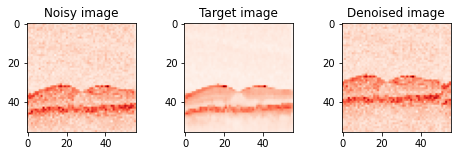

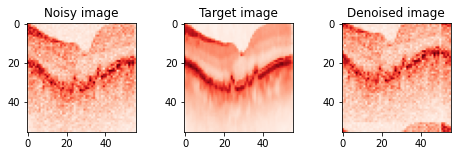

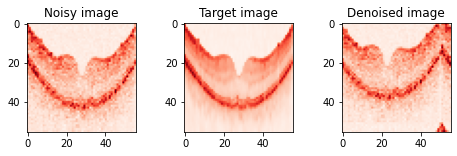

In [32]:
n = 3
for i in range(n):
    fig, axes = plt.subplots(1, 3)
    fig.set_size_inches(8, 2)
    axes[0].set_title('Noisy image')
    im0 = axes[0].imshow(LR_images_list_test[i].reshape(dimension, dimension), cmap = 'Reds') #, cmap = 'Reds'
    axes[1].set_title('Target image')
    im1 = axes[1].imshow(HR_images_list_test[i].reshape(dimension, dimension), cmap = 'Reds') #, cmap = 'Reds'
    axes[2].set_title('Denoised image')
    im2 = axes[2].imshow(all_denoised_images[i].reshape(dimension, dimension), cmap = 'Reds') #, cmap = 'Reds'
    

In [33]:
import tensorflow as tf
psnr = tf.image.psnr(all_denoised_images,LR_images_list_test, max_val = 1)
psnr

<tf.Tensor: shape=(), dtype=float32, numpy=10.781364>